## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

import warnings 
warnings.filterwarnings("ignore")

## Explore Data 

In [2]:
df=pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
df.describe(include="O")

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [7]:
df.duplicated().sum()

313

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(18924, 18)

## EDA

In [10]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


In [11]:
def information_columns(col):
    if df[col].dtype=="O":
        print(df[col].unique(),"\n")
        print(df[col].nunique(),"\n")
        print(df[col].value_counts())
        print("-------------------")

In [12]:
information_columns("Leather interior")

['Yes' 'No'] 

2 

Leather interior
Yes    13731
No      5193
Name: count, dtype: int64
-------------------


In [13]:
information_columns("Category")

['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup'] 

11 

Category
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64
-------------------


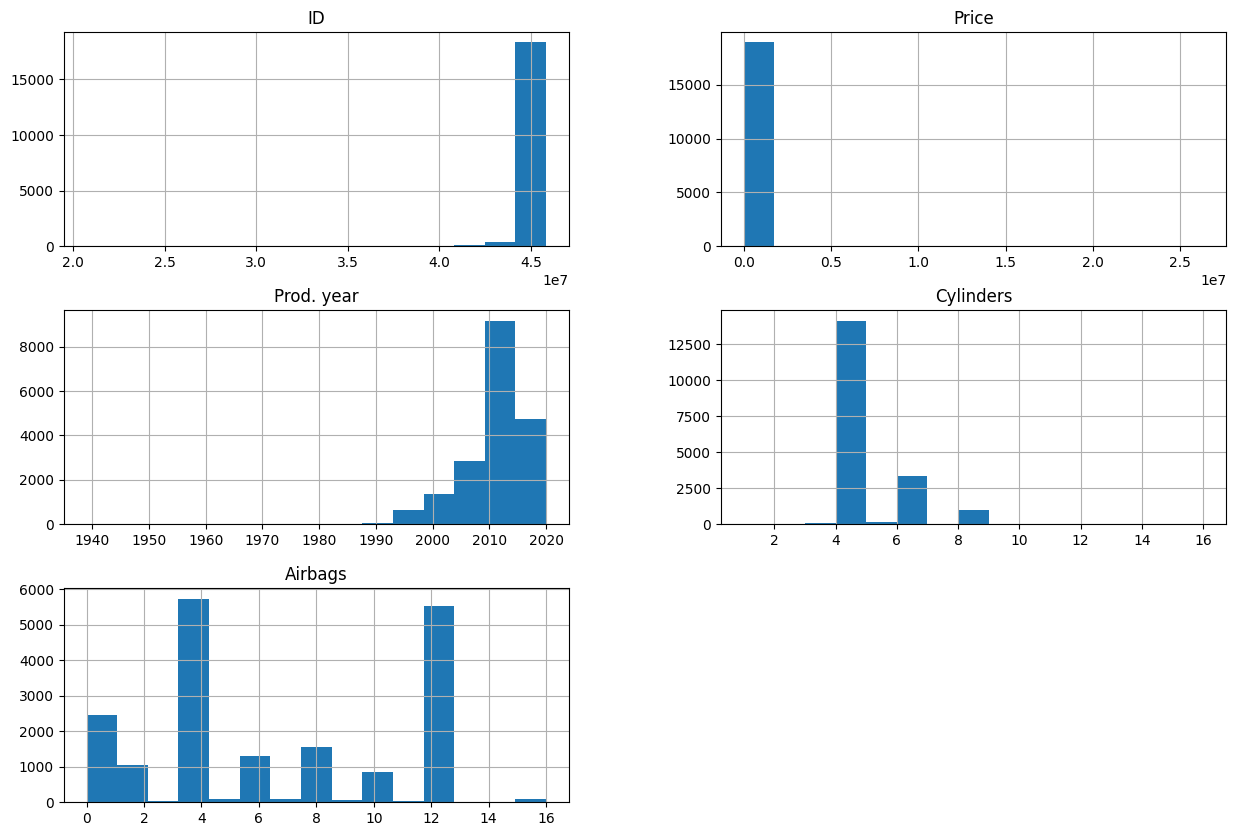

In [14]:
df.hist(bins=15,figsize=(15,10));

In [15]:
top_10_car=df["Manufacturer"].value_counts().sort_values(ascending=False).reset_index(name="Count").head(10)
top_10_car

,Manufacturer,Count
0,HYUNDAI,3729
1,TOYOTA,3606
2,MERCEDES-BENZ,2043
3,FORD,1088
4,CHEVROLET,1047
5,BMW,1036
6,HONDA,960
7,LEXUS,927
8,NISSAN,645
9,VOLKSWAGEN,571


In [16]:
fig = px.bar(top_10_car, x='Manufacturer', y='Count',
             labels={'index': 'Manufacturer', 'Count': 'Count'},
             title='Top 10 Car Manufacturers by Count',text_auto='.2s',template="ggplot2")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
# Show the figure
fig.show()

In [17]:
top10meanPrices=[df[df["Manufacturer"]==i]["Price"].mean() for i in list(top_10_car.Manufacturer)]

In [18]:
fig = px.line(x=top_10_car.Manufacturer, y=top10meanPrices, title='Top 10 Car Mean',text=np.round(top10meanPrices),template="ggplot2")
fig.update_traces(textposition="bottom right")
fig.show()

In [19]:
made_by_year=df.groupby("Manufacturer")["Prod. year"].value_counts().reset_index(name="Total")
made_by_year

,Manufacturer,Prod. year,Total
0,ACURA,2010,5
1,ACURA,2012,3
2,ACURA,2015,3
3,ACURA,2014,2
4,ACURA,2001,1
...,...,...,...
817,VOLVO,2014,1
818,ZAZ,1989,1
819,ZAZ,1990,1
820,სხვა,2005,1


In [20]:
fig = px.line(made_by_year,x=made_by_year["Manufacturer"], y=made_by_year["Prod. year"], title='Made Per Year',template="ggplot2")
fig.update_traces(textposition="bottom right")
fig.show()

In [21]:
fig_line = px.line(made_by_year, x='Prod. year', y='Total', color='Manufacturer',
                   title='Number of Cars Made by Manufacturer Over the Years',
                   labels={'Prod. year': 'Production Year', 'Total': 'Total Cars'},
                   markers=True)

# Show the line chart
fig_line.show()


In [22]:
price_sum_by_year=df.groupby(["Manufacturer","Prod. year"])["Price"].sum().reset_index(name="Total")


In [23]:
fig_line = px.line(price_sum_by_year, x='Prod. year', y='Total', color='Manufacturer',
                   title='Total Car Prices by Manufacturer Over the Years',
                   labels={'Prod. year': 'Production Year', 'Total': 'Total Price'},
                   markers=True)

# Show the line chart
fig_line.show()

In [24]:
numeric_Col=[]
for col in df.columns:
    if df[col].dtypes!="O":
        numeric_Col.append(col)

In [25]:
numeric_Col

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']

In [26]:
corr_matrix=df[['ID',"Price","Prod. year","Cylinders","Airbags"]]
data_Corr=corr_matrix.corr()

In [27]:
fig = px.imshow(data_Corr, text_auto=True,width=500,height=500,template="plotly_white")
fig.show()


In [28]:
df_object=df.select_dtypes("O")

In [29]:
df_object

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


In [30]:
for col in df_object:
    top10=df_object[col].value_counts().head(10).reset_index(name='Count')
    fig = px.bar(top10, x=col, y='Count',
                 title=f'Top 10 Values for {col}',
                 labels={col: col, 'Count': 'Frequency'},
                 text='Count',template="ggplot2")
    fig.update_layout(xaxis_title=col, yaxis_title='Frequency', title_text=f'Top 10 Values for {col}')
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.show()

<Figure size 1500x1000 with 0 Axes>

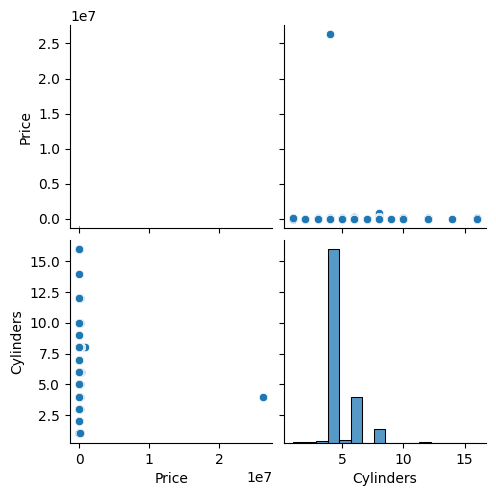

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Price', 'Engine volume', 'Mileage', 'Cylinders']
plt.figure(figsize=(15,10))
sns.pairplot(df[numeric_cols])
plt.show()

In [32]:
price_by_category_manufacturer = df.groupby(['Manufacturer', 'Category'])['Price'].mean().reset_index()

fig = px.bar(price_by_category_manufacturer, x='Manufacturer', y='Price', color='Category',
             title='Average Price by Manufacturer and Category',
             labels={'Manufacturer': 'Manufacturer', 'Price': 'Average Price'},
             barmode='group')
fig.show()

In [33]:
fig = px.scatter(df, x='Engine volume', y='Price', color='Cylinders',
                 title='Price vs Engine Volume by Number of Cylinders',
                 labels={'Engine volume': 'Engine Volume', 'Price': 'Price'},
                 hover_data=['Manufacturer', 'Model'])
fig.show()

In [34]:
fig = px.scatter(df, x='Mileage', y='Price',
                 title='Price vs Mileage',
                 labels={'Mileage': 'Mileage', 'Price': 'Price'})
fig.show()

In [35]:
price_by_year = df.groupby('Prod. year')['Price'].mean().reset_index()

fig = px.line(price_by_year, x='Prod. year', y='Price',
              title='Average Price by Production Year',
              labels={'Prod. year': 'Production Year', 'Price': 'Average Price'},template="ggplot2",markers=True)
fig.show()

In [36]:
price_by_fuel_type = df.groupby('Fuel type')['Price'].mean().reset_index()
fig = px.bar(price_by_fuel_type, x='Fuel type', y='Price',
             title='Average Price by Fuel Type',
             labels={'Fuel type': 'Fuel Type', 'Price': 'Average Price'},template="ggplot2")
fig.show()

In [37]:
price_by_leather_interior = df.groupby('Leather interior')['Price'].mean().reset_index()

fig = px.bar(price_by_leather_interior, x='Leather interior', y='Price',
             title='Average Price by Leather Interior',
             labels={'Leather interior': 'Leather Interior', 'Price': 'Average Price'},template="ggplot2")
fig.show()

In [38]:
price_by_doors = df.groupby('Doors')['Price'].mean().reset_index()

fig = px.bar(price_by_doors, x='Doors', y='Price',
             title='Average Price by Number of Doors',
             labels={'Doors': 'Number of Doors', 'Price': 'Average Price'},template="ggplot2")
fig.show()

In [39]:
price_by_gearbox = df.groupby('Gear box type')['Price'].mean().reset_index()

fig = px.bar(price_by_gearbox, x='Gear box type', y='Price',
             title='Average Price by Gear Box Type',
             labels={'Gear box type': 'Gear Box Type', 'Price': 'Average Price'},template="ggplot2")
fig.show()

In [40]:
price_Drive_wheels = df.groupby('Drive wheels')['Price'].mean().reset_index()

fig = px.bar(price_Drive_wheels, x='Drive wheels', y='Price',
             title='Average Price by Drive wheels',
             labels={'Drive wheels': 'Drive wheels', 'Price': 'Average Price'},template="ggplot2")
fig.show()

## Data PreProcessing

In [41]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [42]:
data=df.drop(['Doors','ID'],axis=1)
data.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2


In [43]:
data.Levy=data.Levy.replace({"-":"0"})
data["Levy"]=data["Levy"].astype(float)

In [44]:
dtnow=datetime.datetime.now().year
data["Age"]=dtnow-data["Prod. year"]

In [45]:
data=data.drop("Prod. year",axis=1)

In [46]:
data.Mileage=data["Mileage"].str.replace(" km","000")
data.Mileage

0        186005000
1        192000000
2        200000000
3        168966000
4         91901000
           ...    
19232    300000000
19233    161600000
19234    116365000
19235     51258000
19236    186923000
Name: Mileage, Length: 18924, dtype: object

In [47]:
data["Engine volume"]=data["Engine volume"].str.replace("Turbo","")
data["Engine volume"]=data["Engine volume"].astype(float)
data["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  object 
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: float64(3), int64(3), object(10)
memory us

### Outlier

In [49]:
for col in data.columns:
    if data[col].dtype!="object":
        q1=data[col].quantile(0.25)
        q2=data[col].mean()
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        low=q1-1.5*iqr
        high=q3+1.5*iqr
        outlier=((data[col]>high)|(data[col]<low)).sum()
        total=data[col].shape[0]
        print(f"Total Outlier In {col} are : {outlier}-{np.round(100*(outlier)/total,2)}%")
        if outlier>0:
            data=data.loc[(data[col]>=low) & (data[col]<=high)]

Total Outlier In Price are : 1055-5.57%
Total Outlier In Levy are : 161-0.9%
Total Outlier In Engine volume are : 1034-5.84%
Total Outlier In Cylinders are : 3261-19.56%
Total Outlier In Airbags are : 0-0.0%
Total Outlier In Age are : 1173-8.75%


#### Transfom data

In [50]:
Data_object=data.select_dtypes("O")
Data_Numeric=data.select_dtypes(exclude="O")

In [51]:
LE=LabelEncoder()

In [52]:
for i in range(0,Data_object.shape[1]):
    Data_object.iloc[:,i]=LE.fit_transform(Data_object.iloc[:,i])

In [53]:
Data_object

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color
2,16,347,3,0,4,2493,3,1,1,1
3,12,334,4,1,2,1954,0,0,0,14
4,16,347,3,1,4,5679,0,1,0,12
5,17,683,4,1,1,1778,0,1,0,14
6,43,616,3,1,2,3046,0,1,0,14
...,...,...,...,...,...,...,...,...,...,...
19230,43,616,3,1,2,3364,0,1,0,12
19233,17,697,8,1,4,1795,2,1,0,11
19234,17,770,4,1,1,533,0,1,0,7
19235,6,213,4,1,1,4225,0,1,0,1


In [54]:
data=pd.concat([Data_object,Data_Numeric],axis=1)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      12240 non-null  object 
 1   Model             12240 non-null  object 
 2   Category          12240 non-null  object 
 3   Leather interior  12240 non-null  object 
 4   Fuel type         12240 non-null  object 
 5   Mileage           12240 non-null  object 
 6   Gear box type     12240 non-null  object 
 7   Drive wheels      12240 non-null  object 
 8   Wheel             12240 non-null  object 
 9   Color             12240 non-null  object 
 10  Price             12240 non-null  int64  
 11  Levy              12240 non-null  float64
 12  Engine volume     12240 non-null  float64
 13  Cylinders         12240 non-null  float64
 14  Airbags           12240 non-null  int64  
 15  Age               12240 non-null  int64  
dtypes: float64(3), int64(3), object(10)
memory us

In [56]:
data

,Manufacturer,Model,Category,Leather interior,Fuel type,Mileage,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Cylinders,Airbags,Age
2,16,347,3,0,4,2493,3,1,1,1,8467,0.0,1.3,4.0,2,18
3,12,334,4,1,2,1954,0,0,0,14,3607,862.0,2.5,4.0,0,13
4,16,347,3,1,4,5679,0,1,0,12,11726,446.0,1.3,4.0,4,10
5,17,683,4,1,1,1778,0,1,0,14,39493,891.0,2.0,4.0,4,8
6,43,616,3,1,2,3046,0,1,0,14,1803,761.0,1.8,4.0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,43,616,3,1,2,3364,0,1,0,12,470,645.0,1.8,4.0,12,13
19233,17,697,8,1,4,1795,2,1,0,11,15681,831.0,2.4,4.0,8,13
19234,17,770,4,1,1,533,0,1,0,7,26108,836.0,2.0,4.0,4,14
19235,6,213,4,1,1,4225,0,1,0,1,5331,1288.0,2.0,4.0,4,17


In [57]:
for col in data.columns:
    data[col]=data[col].astype(int)

## Model

In [58]:
X=data.drop("Price",axis=1)
y=data["Price"]

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
Algorithms=["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","GradientBoostingRegressor","AdaBoostRegressor","XGBRegressor","SVR"]
RMSE=[]
R2=[]

In [61]:
def Model_information(model):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    r2=r2_score(y_test,preds)
    R2.append(r2)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    RMSE.append(rmse)
    score=model.score(X_test,y_test)
    print(f"The Score Of The {model} : {score}")

In [62]:
lrmodel=LinearRegression()
DCmodel=DecisionTreeRegressor()
RFmodel=RandomForestRegressor()
GBmodel=GradientBoostingRegressor()
ABmodel=AdaBoostRegressor()
XGmodel=XGBRegressor()
svrmodel=SVR()

In [63]:
Model_information(lrmodel)
Model_information(DCmodel)
Model_information(RFmodel)
Model_information(GBmodel)
Model_information(ABmodel)
Model_information(XGBRegressor())
Model_information(svrmodel)

The Score Of The LinearRegression() : 0.212781269046165
The Score Of The DecisionTreeRegressor() : 0.6027156435337617
The Score Of The RandomForestRegressor() : 0.7714881364849819
The Score Of The GradientBoostingRegressor() : 0.6618993105793679
The Score Of The AdaBoostRegressor() : 0.3586089293299054
The Score Of The XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs

In [64]:
Preformance_model=pd.DataFrame({"Algorithms":Algorithms,"RMSE":RMSE,"R2_Score":R2})

In [65]:
Preformance_model

,Algorithms,RMSE,R2_Score
0,LinearRegression,9874.654146,0.212781
1,DecisionTreeRegressor,7014.955436,0.602716
2,RandomForestRegressor,5320.207366,0.771488
3,GradientBoostingRegressor,6471.384618,0.661899
4,AdaBoostRegressor,8913.240785,0.358609
5,XGBRegressor,5452.806787,0.759955
6,SVR,11149.381576,-0.003583


In [66]:
fig = px.line(
    Preformance_model,
    x='Algorithms',
    y='R2_Score',
    title='R2 Score by Algorithm', markers=True
)
fig.show()

In [67]:
fig = px.line(
    Preformance_model,
    x='Algorithms',
    y='RMSE',
    title='RMSE Score by Algorithm', markers=True
)
fig.show()

In [68]:
import pickle
File_Name="Cars_Predictions.sav"
pickle.dump(RFmodel,open(File_Name,"wb"))